<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 0 - Notación asintótica </h2>
</center>
</p>
</div>

## Notación

A lo largo de este notebook veremos los conceptos básicos de notación asintótica que nos servirán para definir la complejidad de nuestros algoritmos.

Para ello utilizaremos los siguientes símbolos

- $\Theta$ (Theta)
- $O$, $o$ (Omicron)
- $\Omega$ (Omega)


Pero, cómo definimos la complejidad de un algoritmo? Tienen los siguientes tres algoritmos la misma complejidad?

In [1]:
def alga(i):
    return i
    
def algb(i):     
    total = 0    
    for m in i:  
        total+=m  
    return total

def algc(i):
    total=0
    for m in i:
        for j in i:
            total+=m+j
    return total

Comprobemos el tiempo de ejecución de cada uno de los algoritmos

In [2]:
import random
_list = random.sample(range(30), 4)

%timeit alga(_list)
%timeit algb(_list)
%timeit algc(_list)

The slowest run took 34.43 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 72.6 ns per loop
The slowest run took 14.25 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 183 ns per loop
The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 809 ns per loop


<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Qué complejidad tienen las funciones _alga_, _algb_ y _algc_ notándolas como $\Theta, O, \Omega$?
</strong></p>
<p>
Recordatorio:
<ul>
<li>$o(n)$: Crecimiento menor a $n$</li>
<li>$O(n)$: Crecimiento menor o igual a $n$</li>
<li>$\Theta(n)$: Crecimiento igual a $n$</li>
<li>$\Omega(n)$: Crecimiento igual o superior a $n$</li>
</ul>
</p>
</div>

## Resposta
### `alga`
- $\Theta (n) = 1$
- $O (n) = 1$
- $\Omega (n) =1$

### `algb`
- $\Theta (n) = n + 2$
- $O (n) = n + 2$
- $\Omega (n) = n$

### `algc`
- $\Theta (n) = n^2 + 2$
- $O (n) = n^2 + 2$
- $\Omega (n) = n^2$

In [3]:
def sumapares(lista, listb):
    listc = []
    for x in lista:
        for y in listb:
            listc.append(x+y)
    return listc

sumapares([1,2,3],[4,5,6])

[5, 6, 7, 6, 7, 8, 7, 8, 9]

<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Qué complejidad tiene la función $sumapares$?
</strong></p>
</div>

### Resposta

Si $N$ es `len(lista)` i $M$ es `len(listab)`, la complexitat de l'algoritme `sumapares` es de $2NM + 1$, i.e $O(NM)$. 

La funcio recorre els $N$ elements de `llista`, i per cada element d'aquests recorre tots els elements $M$ de `llistab` i realitza dues operacions: una suma i un `append`. Finalment realitza un return.

## Orden de magnitud

Normalmente las operaciones de coste constante $O(1)$ las menospreciamos y analizamos la complejidad en base al orden de magnitud, por lo que una función cuya complejidad exacta fuere $O(3x^2+6)$ la denotarmemos como $O(3x^2)$.

<div class="alert alert-danger">
<h1>Problema 1</h1>
<p><strong>
Implementa algoritmos que tengan las complejidades siguientes: <ul><li>$O(1)$</li><li>$O(n)$</li><li>$O(n^2)$</li><li>$O(log(n))$</li><li>$O(2^n)$</li><li>$O(n!)$</li></ul>

</strong></p>
<p><b>Nota: </b> Puedes cambiar la declaración de las funciones si lo consideras necesario.</p>
</div>

In [4]:
N = 10**1

In [5]:
def o(a):
    return a

%timeit o(N)

The slowest run took 30.21 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 59.6 ns per loop


In [6]:
def on(a):
    return [i for i in range(a)]

%timeit on(N)

The slowest run took 6.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 559 ns per loop


In [7]:
def onsquare(a):
    return [j for i in range(a) for j in range(a)]

%timeit onsquare(N)

100000 loops, best of 3: 4.23 µs per loop


In [8]:
from math import floor, ceil
# Reference:
# https://en.wikipedia.org/wiki/Binary_search_algorithm

def ologn(a, t):
    l = 0
    r = len(a)-1
    
    while l <= r:
        m = (l + r) // 2
        
        if a[m] < t:
            l = m + 1
        elif a[m] > t:
            r = m - 1
        else:
            return m

    return None

In [9]:
# Some tests

from random import randint

MAX = 10**3

array = sorted([randint(0, MAX) for _ in range(N)])
target_index = randint(0, len(array)-1)
target = array[target_index]

print("array[{}] = {}".format(target_index, target))
%timeit ologn(array, target)


array[3] = 434
The slowest run took 7.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 484 ns per loop


In [10]:
# The Fibonacci algorithm create a binary tree recursion

def oexpn(a):
    if a <= 1:
        return 1
    
    return oexpn(a-1) + oexpn(a-2)

%timeit oexpn(N)

100000 loops, best of 3: 14 µs per loop


In [11]:
def onfact(a):
    if a == 0:
        return
    
    (onfact(a-1) for i in range(a))    

%timeit onfact(N)

The slowest run took 8.29 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 519 ns per loop


<div class="alert alert-warning">
<h1>Pregunta 3</h1>
<p><strong>
Evalua la complejidad exacta de cada uno de los algoritmos anteriores
</strong></p>
</div>

### `o(a)`
With `n=a` we have
$\Theta(n) = 1$.

### `on(a)`
With `n=a` we have
$\Theta(n) = n$.

### `onsquare(a)`
With `n=a` we have
$\Theta(n) = n^2$.

### `ologn(a, t)`
With `n=len(a)` and `t` an element of `a` we cannot know the exact complexity. At worst we will have
$\Theta(n) = \log (n)$. In general, $O(n) = \log (n)$.

### `oexpn(a)`
With `n=a` we have 
$\Theta(n) = 2^n$.

### `onfact(a)`
With `n=a` we have
$\Theta(n) = n!$.

## Un ejemplo gráfico...

In [12]:
# Install requirements for local notebook, if not satisfied
# import sys
# !{sys.executable} -m pip install matplotlib numpy

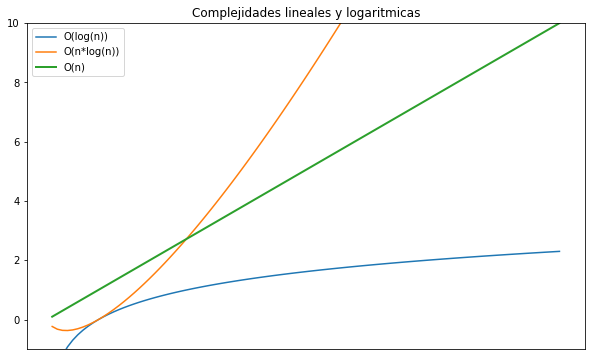

In [13]:
# En este apartado mostramos las gráficas de las diferentes funciones
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

lin = np.linspace(0.1,10,100)
plt.figure(figsize=(10,6))
plt.title('Complejidades lineales y logaritmicas')
plt.plot(np.log(lin),label='O(log(n))')
plt.plot(lin*np.log(lin),label='O(n*log(n))')
plt.plot(lin, linewidth=2, label='O(n)')
plt.legend()
plt.plot()
plt.ylim(-1,10)
plt.xticks([])
plt.draw()

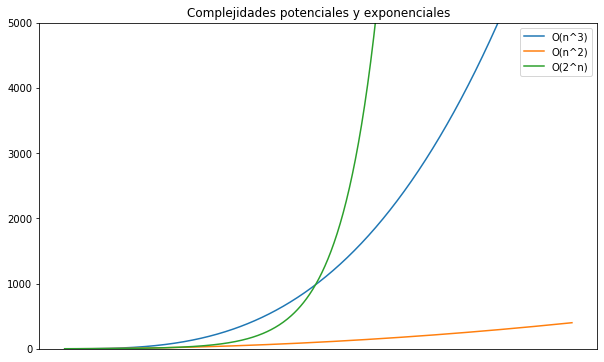

In [14]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

lin = np.linspace(0.1,20,500)
plt.figure(figsize=(10,6))
plt.title('Complejidades potenciales y exponenciales')
plt.plot(lin**3,label='O(n^3)')
plt.plot(lin**2,label='O(n^2)')
plt.plot(2**lin, label='O(2^n)')
plt.legend()
plt.plot()
plt.ylim(-1,5000)
plt.xticks([])
plt.draw()

<div class="alert alert-danger">
<h1>Problema 2</h1>
<p><strong>
Implementa un algoritmo de ordenación que tenga complejidad $O(n^2)$
</strong></p>
</div>

In [15]:
# Bubble sort

def ordenacion1(a):
    A = a.copy()
    n = len(A)
    
    while True:
        swapped = False
        for i in range(1, n):
            if A[i-1] > A[i]:
                tmp = A[i]
                A[i] = A[i-1]
                A[i-1] = tmp
                swapped = True
                
        if swapped is False:
            break
    
    return A

<div class="alert alert-danger">
<h1>Problema 3</h1>
<p><strong>
    Implementa un algoritmo de ordenación que tenga complejidad $O(n\log(n))$
</strong></p>
</div>

In [16]:
# Qsort

def partition(A, lo, hi):
    pivot = A[hi]
    i = lo
    
    for j in range(lo, hi+1):
        if A[j] < pivot:
            tmp = A[i]
            A[i] = A[j]
            A[j] = tmp
            i += 1
    
    tmp2 = A[i]
    A[i] = A[hi]
    A[hi] = tmp2

    return i

def ordenacion2(A, lo, hi):    
    if lo < hi:
        p = partition(A, lo, hi)
        ordenacion2(A, lo, p - 1)
        ordenacion2(A, p + 1, hi)
    
    return A

<h3>Pon a prueba tus algoritmos</h3>
<p>
    El siguiente bloque de código ejecutará y medirá el coste de los dos algoritmos de ordenación que acabas de implementar. Las pruebas se harán para listas de tamaño creciente de longitud de 1 a #num_tests (por defecto 1000). Puede tardar un poco, si no termina puedes bajar la cantidad de tests. Si está todo bien deberías poder observar un coste creciente cuadrático en el caso $O(n^2)$ y un crecimiento logarítmico escaso en el caso de $O(n\log(n))$.
</p>

Elapsed time to compute tests: 3.428 s.


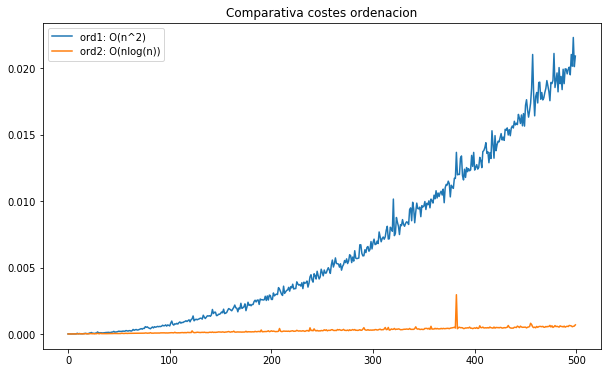

In [17]:
from utils import generate_corpus
import time
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

num_tests = 5*10**2

all_lists = generate_corpus(num_tests)
time_costs_ordenacion1 = [0] * num_tests
time_costs_ordenacion2 = [0] * num_tests

t0 = time.time()

for test in range(num_tests):
    # Test ordenacion1
    start_time = time.time()
    ordenacion1(all_lists[test])
    time_costs_ordenacion1[test] = (time.time() - start_time)
    
    # Test ordenacion2
    start_time = time.time()
    ordenacion2(all_lists[test], 0, len(all_lists[test])-1)
    time_costs_ordenacion2[test] = (time.time() - start_time) 

    
print("Elapsed time to compute tests: {:2.4} s."
      .format(time.time() - t0))

plt.figure(figsize=(10,6))
plt.title('Comparativa costes ordenacion')
plt.plot(time_costs_ordenacion1,label='ord1: O(n^2)')
plt.plot(time_costs_ordenacion2,label='ord2: O(nlog(n))')
plt.legend()
plt.plot()
plt.draw()

## Algoritmos recursivos: Master Theorem

El teorema master ayuda a definir las complejidades de los algoritmos que utilizan estratégias Divide and Conquer. Dicho de otra forma, nos ayuda a analizar la complejidad para los algoritmos recursivos.

Siendo $T(n)$ la complejidad del algoritmo, $f(n)$ la complejidad del caso base, $a$ el número de subproblemas a cada nivel de recursión y $b$ el factor por el que dividimos la entrada, denotamos la complejidad de un algoritmo recursivo como:

$$
T(n) = aT\big(\frac{n}{b}\big)+f(n)
$$

Si notamos la función $f(x)$ en base a su complejidad de la forma $O(n^d)$ obtenemos:

$$
T(n) = aT\big(\frac{n}{b}\big)+O(n)
$$

Y según el teorema masters podemos afirmar que:

\begin{equation*}
T(n)=O(n^d) \quad \textrm{if}\: d>log_b a\\
T(n)=O(n^d\log n) \quad \textrm{if}\: d=log_b a\\
T(n)=O(n^{\log_b{a}}) \quad \textrm{if}\: d<log_b a
\end{equation*}

<div class="alert alert-warning">
<h1>Pregunta 4</h1>
<p><strong>
Analiza la complejidad en la siguiente función:
</strong></p>
</div>

In [18]:
# NOTE:
# If length of lista != 0 (mod 2) 
# the function raises a RecursionError
# for max recursion depth

def reverse2n(lista):
    # Base case: 3 op.
    if len(lista) == 2:
        return [lista[1], lista[0]]
    
    # General case: 4 op. + binary partition
    else:
        p = int(len(lista)/2)
        return reverse2n(lista[p:]) + reverse2n(lista[:p])

### Resposta

The formula says: 
$$T(n) = 2 \cdot T\left(\frac{n}{2}\right) + 4 = 2 \cdot \left(T\left(\frac{n}{2}\right) + 1\right)$$

In our case we have that
$f(n) = \Theta (n^c \log^k n)$ where $c = \log_b a = \log_2 2 = 1$ and $k=0$. We are in the second case [1], we have that
$$T(n) = \Theta (n^c \log^{k+1} n) = \Theta (n \log n)$$

[1] [Wikipedia: Master Theorem (analysis of algorithms)](https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)

In [19]:
# Some tests

# arr = [1,2,3,5,8,10,4,6]
arr = [1,2,3,5,8,10,4,6,1,2,3,5,8,10,4,6,1,2,3,5,8,10,4,6,1,2,3,5,8,10,4,6]
reverse2n(arr)

def T(n):
    a = 2
    b = 2
    fn = 4
    
    if n == 2:
        return 3
    
    return a * T(n // b) + fn


from math import log

print(T(len(arr)))
print(len(arr) * log(len(arr)))

108
110.90354888959125


<div class="alert alert-success">
<h1>Extra 1</h1>
<p><strong>
Implementa dos algoritmos que busquen un nombre concreto en un listín telefónico y devuelvan su número. Uno con coste $O(n)$ y otro con $O(\log n)$. En caso de no encontrar el nombre, devolver -1.
</strong></p>
</div>

In [20]:
def search(listin, name):
    for n, num in listin:
        if n == name:
            return num
    
    return -1

def search_log(a, t):
    l = 0
    r = len(a)-1
    
    while l <= r:
        m = (l + r) // 2
        
        if a[m][0] < t:
            l = m + 1
        elif a[m][0] > t:
            r = m - 1
        else:
            return a[m][1]

    return -1

In [21]:
listin = [('Abdon', 938906293), ('Alejo', 935198770), ('Anna', 931621906), ('Arturo', 938806195), ('Baldomero', 930964092), ('Benjamin', 934354128), ('Cayetano', 931005100), ('Clotilde', 932242962), ('Eduardo', 934005954), ('Eugenio', 931748905), ('Fabian', 938021389), ('Fermin', 939101910), ('Fernando', 940649340), ('Guillermo', 934387595), ('Jacobo', 934210458), ('Josep', 940820109), ('Leonor', 930434129), ('Lucrecia', 934411771), ('Manuel', 933697107), ('Marcelino', 936305412), ('Mohamed', 930600723), ('Nicolas', 936020020), ('Oscar', 940094360), ('Petronila', 936016855), ('Reinaldo', 939455199), ('Rodrigo', 937957205), ('Ruben', 938853772), ('Simeon', 938687016), ('Simeon', 931726372), ('Tarsicio', 934346208), ('Victorino', 939555230)]
print(search(listin, 'Petronila')==936016855)
print(search_log(listin, 'Baldomero')==930964092)

True
True


<div class="alert alert-success">
<h1>Extra 2</h1>
<p><strong>
Implementa el calculo de la serie de fibonacci para un número en concreto de forma recursiva y analiza su complejidad.
</strong></p>
</div>

In [22]:
def fiborec(n):
    if n <= 2:
        return 1
    
    return fiborec(n-1) + fiborec(n-2)

Total elapsed time: 4.144 s.


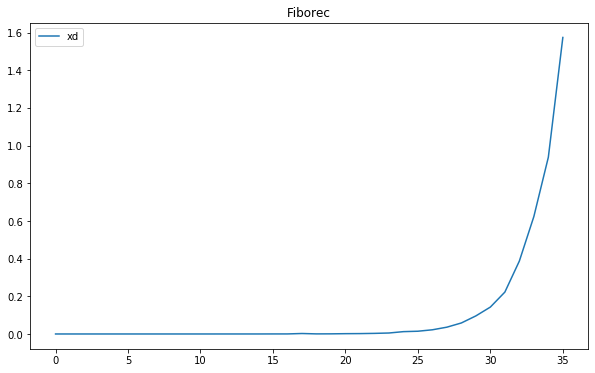

In [23]:
# Some tests

from time import time
import matplotlib.pyplot as plt

%matplotlib inline

N = 36
_time = []
for i in range(N):
    t = time()
    fiborec(i)
    _tmp = time() - t
    _time.append(_tmp)

plt.figure(figsize=(10,6))
plt.title('Fiborec')
plt.plot(_time, label='xd')
plt.legend()
plt.plot()
plt.draw()

print("Total elapsed time: {:2.4} s.".format(sum(_time)))